In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio
import missingno

In [3]:
data = lasio.read(r"C:\Users\admin\Downloads\WELL.LAS")

In [4]:
data.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [5]:
for item in data.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}")

 (STRT): 		 4098.0
 (STOP): 		 5637.0
 (STEP): 		 0.5
 (NULL): 		 -999.25
COMPANY (COMP): 		 
FIELD (FLD): 		 
LOCATION (LOC): 		 
DATE (DATE): 		 18-AUG-2020
Well Name (WELL): 		 Well 2
Well Label (LABL): 		 
API Number (APIN): 		 
Unique Well Number (UWI): 		 
Well Number (NUMB): 		 


# Converting LAS to Pandas dataframe so we can work on

In [6]:
pdata = data.df()

In [7]:
pdata.reset_index(drop=True, inplace=True)

In [8]:
pdata.head(7)

,TVD,GR,SP,CALI,RT10,RT20,RT30,RT60,RT90,NPHI,DPHI,PE,RHOB,DRHO,SPHI,DELTAT
0,4098.0,28.881,86.094,8.194,1.848,1.496,1.333,1.275,1.231,0.143,0.177,4.756,2.407,0.015,0.157,69.753
1,4098.5,28.876,87.369,8.199,1.834,1.498,1.344,1.290,1.248,0.141,0.190,4.829,2.386,0.010,0.154,69.380
2,4099.0,26.491,88.806,8.202,1.904,1.566,1.411,1.358,1.317,0.137,0.194,4.718,2.379,0.005,0.150,68.823
3,4099.5,24.614,90.158,8.207,2.116,1.745,1.576,1.518,1.475,0.132,0.186,4.601,2.392,0.003,0.143,67.885
4,4100.0,24.347,91.737,8.208,2.585,2.117,1.909,1.836,1.787,0.120,0.174,4.498,2.413,0.005,0.135,66.693
5,4100.5,26.319,93.313,8.199,3.285,2.666,2.396,2.298,2.244,0.110,0.157,4.366,2.442,0.006,0.124,65.117
6,4101.0,28.962,95.774,8.198,4.121,3.337,2.985,2.859,2.808,0.096,0.129,4.409,2.489,0.009,0.112,63.381


In [41]:
columns=pdata.columns.tolist()

columns.remove("TVD")
print(columns)

['GR', 'SP', 'CALI', 'RT10', 'RT20', 'RT30', 'RT60', 'RT90', 'NPHI', 'DPHI', 'PE', 'RHOB', 'DRHO', 'SPHI', 'DELTAT']


In [10]:
pdata.describe()

,TVD,GR,SP,CALI,RT10,RT20,RT30,RT60,RT90,NPHI,DPHI,PE,RHOB,DRHO,SPHI,DELTAT
count,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3068.000000,3068.000000
mean,4867.500000,60.463532,130.077362,8.102111,42.375452,42.523525,43.021299,45.047142,48.612718,0.088318,0.071426,4.170992,2.587868,0.018876,0.116063,64.012206
std,444.487533,47.369537,35.566174,0.199516,80.618134,88.972893,97.040143,106.611170,117.879162,0.080303,0.059946,0.656135,0.102498,0.028358,0.091071,12.877340
min,4098.000000,9.149000,63.201000,7.627000,1.218000,1.039000,0.942000,0.911000,0.881000,0.000000,-0.006000,2.095000,2.102000,-0.037000,-0.017000,45.243000
25%,4482.750000,31.096000,98.775000,7.995000,6.098000,5.679000,5.459500,5.275500,5.163000,0.025000,0.029000,3.722500,2.548000,0.002000,0.050000,54.640750
50%,4867.500000,45.418000,128.705000,8.054000,15.617000,13.876000,12.800000,12.577000,12.572000,0.064000,0.051000,4.329000,2.623000,0.011000,0.085000,59.650500
75%,5252.250000,77.478000,161.971000,8.185500,46.030500,42.753500,40.743000,39.400500,40.899500,0.126000,0.095000,4.685000,2.660000,0.026000,0.153000,69.293250
max,5637.000000,448.443000,197.582000,9.006000,1001.381000,1136.078000,1229.074000,1365.053000,1467.265000,0.391000,0.355000,5.875000,2.720000,0.182000,0.632000,136.941000


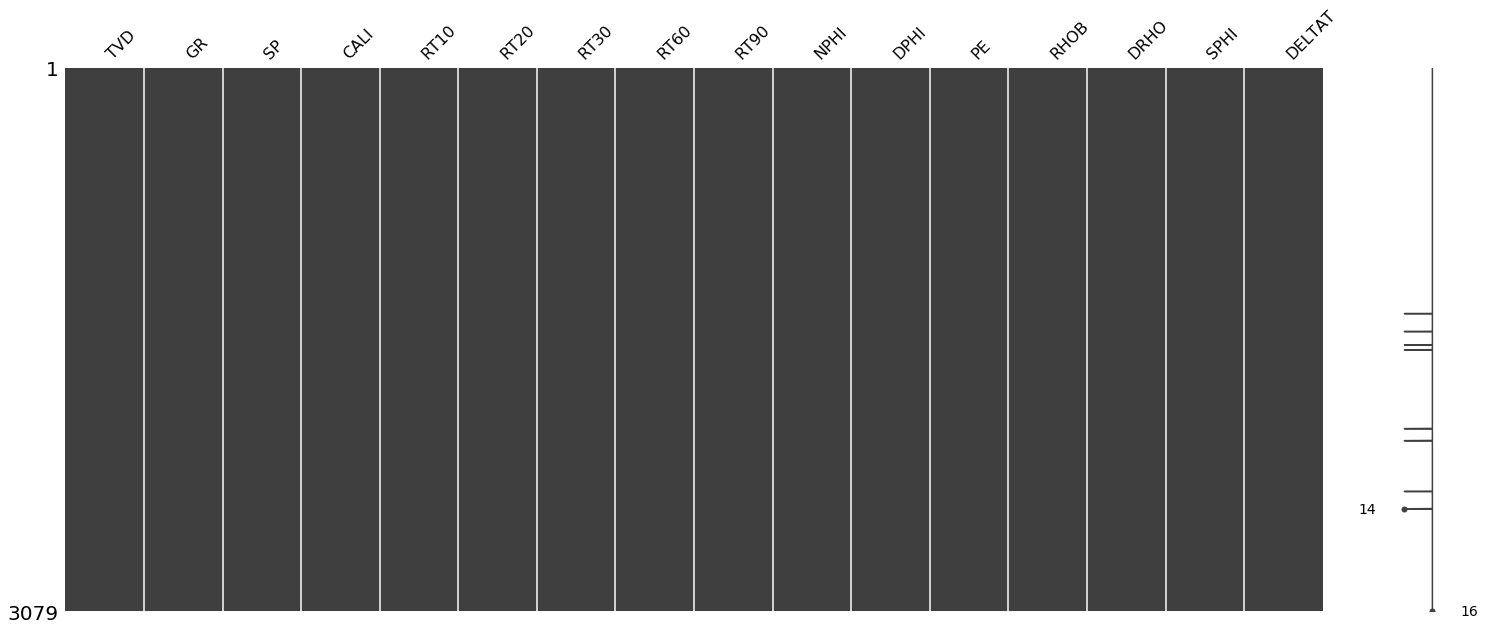

In [11]:
missingno.matrix(pdata)

Good news! it seems we do not have any 'NULL' value

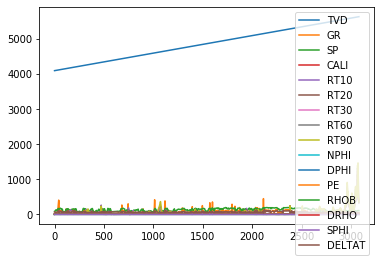

In [12]:
pdata.plot()

ValueError: x and y must have same first dimension, but have shapes (3079,) and (1,)

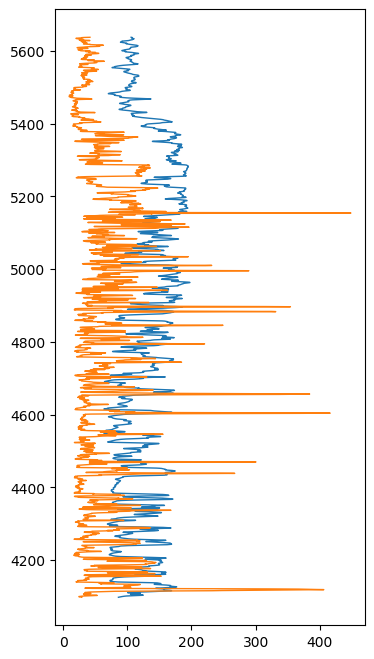

In [134]:
plt.style.use('default')
plt.figure(figsize=(4,8))

plt.plot(pdata['SP'],pdata['TVD'],linewidth=1,label = 'SP')
plt.plot(pdata['GR'],pdata['TVD'], linewidth=1,label = 'GR')
plt.plot(pdata['CALI'],(np.arange(0,10,3079)), linewidth=1,label = 'CALI')

#plt.axhspan(4200,5150,alpha=0.2,color='grey',label='Shale Bed')
plt.yticks(np.arange(4000, 5600, 100))


plt.legend(loc ='upper right')
plt.grid()



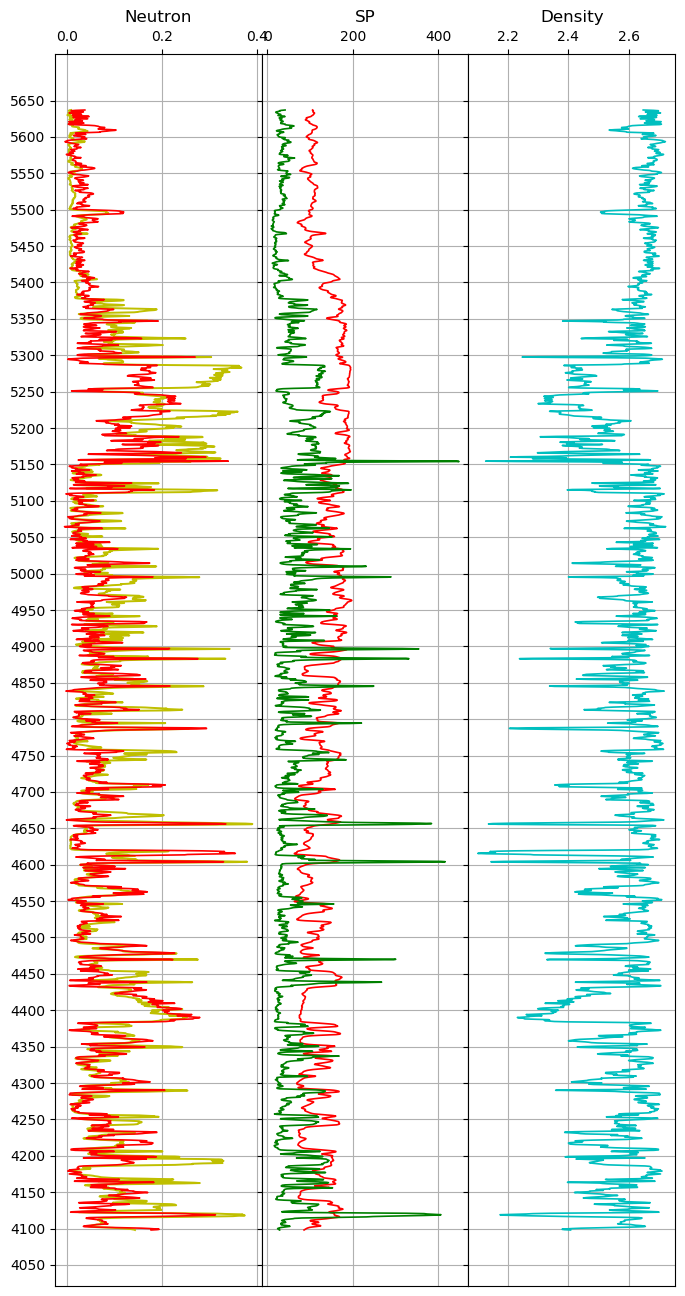

In [121]:
plt.style.use('default')
fig, ax = plt.subplots(1,3,sharex='col', sharey='row' , gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,16)) 

ax[0].plot(pdata['NPHI'],pdata['TVD'], color = "y", linewidth="1.4")
ax[0].plot(pdata['DPHI'],pdata['TVD'], color = "r", linewidth="1.2")

ax[0].set_title('Neutron')
ax[0].grid()
ax[0].xaxis.set_ticks_position('top')


ax[1].plot(pdata['SP'],pdata['TVD'], color = "r",linewidth="1.2")
ax[1].plot(pdata['GR'],pdata['TVD'], color = "g",linewidth="1.2")
ax[1].set_title('SP')
ax[1].xaxis.set_ticks_position('top')
ax[1].grid()

ax[2].plot(pdata['RHOB'], pdata['TVD'], color= "c",linewidth="1.2")
ax[2].xaxis.set_ticks_position('top')
ax[2].set_title('Density')
ax[2].grid()

plt.yticks(np.arange(4050, 5700, 50))
plt.show()

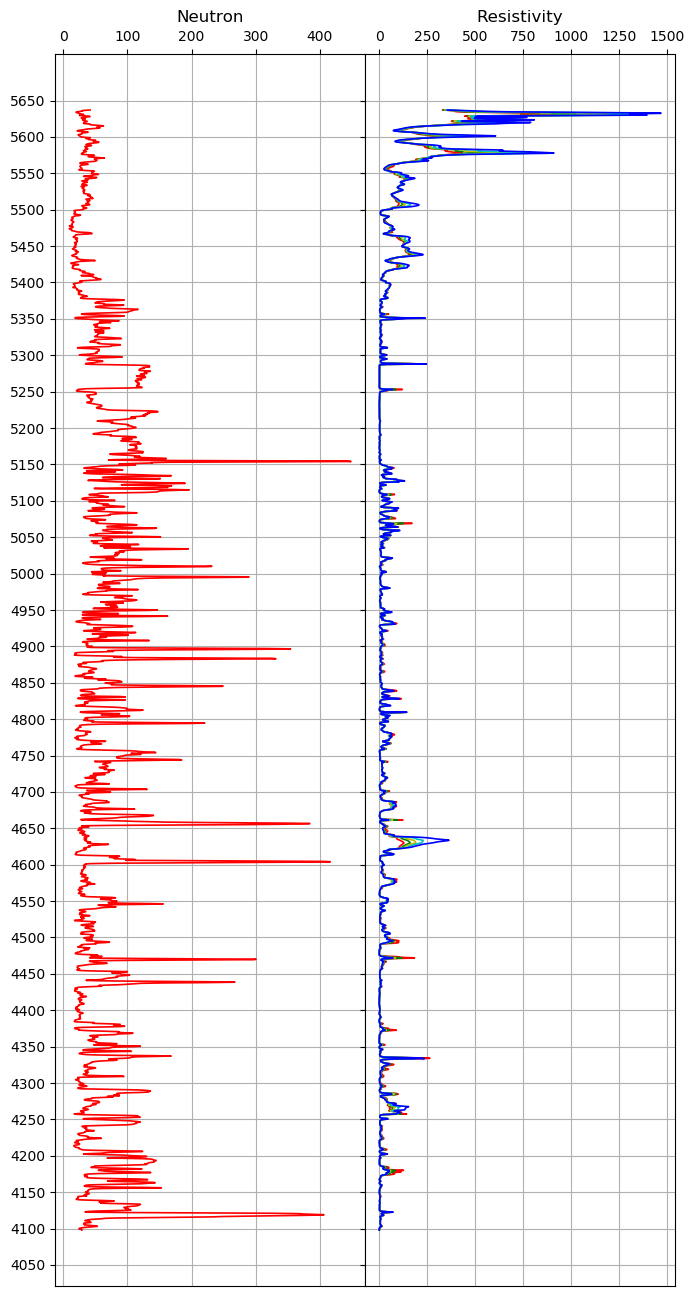

In [129]:
# Resistivity Logs
plt.style.use('default')
fig, ax = plt.subplots(1,2,sharex='col', sharey='row' , gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,16)) 

ax[0].plot(pdata['GR'],pdata['TVD'], color = "r", linewidth="1.2")

ax[0].set_title('Neutron')
ax[0].grid()
ax[0].xaxis.set_ticks_position('top')


ax[1].plot(pdata['RT10'],pdata['TVD'], color = "r",linewidth="1.2")
ax[1].plot(pdata['RT20'],pdata['TVD'], color = "g",linewidth="1.2")
ax[1].plot(pdata['RT30'],pdata['TVD'], color = "y",linewidth="1.2")
ax[1].plot(pdata['RT60'],pdata['TVD'], color = "c",linewidth="1.2")
ax[1].plot(pdata['RT90'],pdata['TVD'], color = "b",linewidth="1.2")

ax[1].set_title('Resistivity')
ax[1].xaxis.set_ticks_position('top')
ax[1].grid()

plt.yticks(np.arange(4050, 5700, 50))
plt.show()

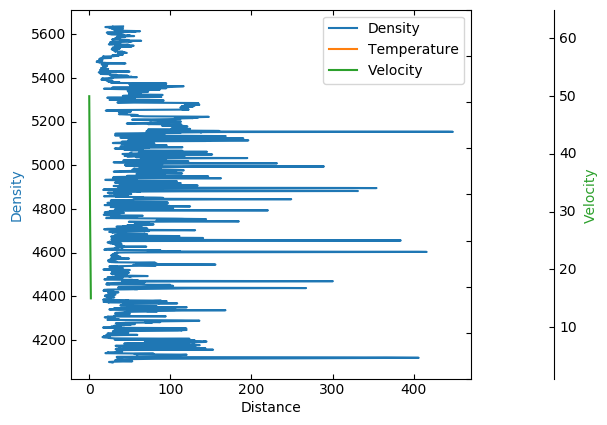

In [138]:

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot(pdata['GR'],pdata['TVD'], label="Density")
p2, = par1.plot(pdata['CALI'],pdata['TVD'], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()

Resources and references:

http://www.bioline.org.br/pdf?ja15068, 


https://petgeo.weebly.com/well-logging.html